### Shape of the utility function evaluated on capital grid [5, 20] on 1000 points

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from src.dp import UtilityFactory, value_iteration

alpha = 0.4
sigma = 1
delta = 0.04

utility = UtilityFactory.utility3(alpha=alpha, delta=delta)
capital = np.linspace(5, 20, num=1000)

c:\Users\Korisnik\Desktop\git\macro\src\dp.py:13: RuntimeWarning: invalid value encountered in log
  return np.log(ct)


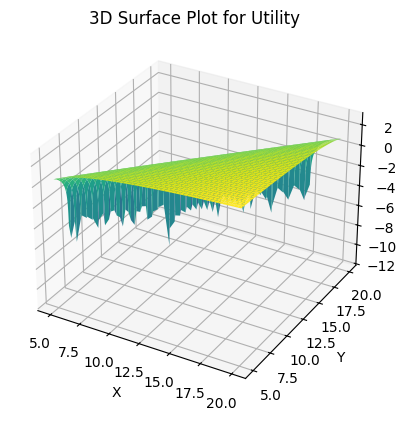

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

X, Y = np.meshgrid(capital, capital)
# Define the function z = f(x, y)
Z = utility(X, Y)

# Set up the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('3D Surface Plot for Utility')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Utility')
plt.show()


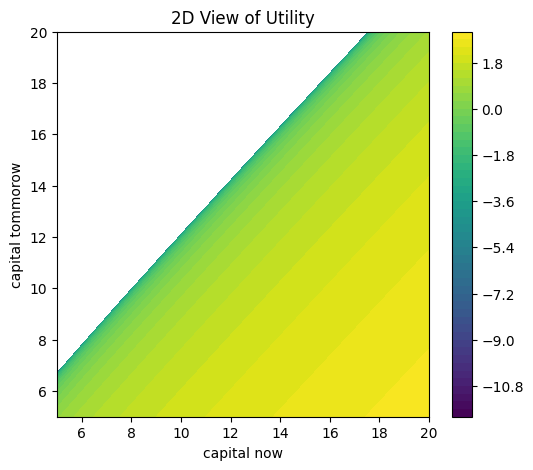

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create the grid
X, Y = np.meshgrid(capital, capital)
Z = utility(X, Y)

# Plot the 2D filled contour
plt.figure(figsize=(6, 5))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title("2D View of Utility")
plt.xlabel("capital now")
plt.ylabel("capital tommorow")
plt.show()


### Algorithm

In [9]:
alpha = 0.4
delta = 0.04
beta = 0.96
epsilon = 0.0001

capital = np.linspace(5, 20, num=1000)
u = UtilityFactory.utility3(alpha, delta)

state_values, state_path = value_iteration(states=capital, utility_function=u, beta=beta, epsilon=epsilon)
np.save('repo/path.npy', state_path)
np.save('repo/state_values.npy', state_values)
#state_path = np.load('repo/path.npy')
#state_values = np.load('repo/state_values.npy')

iter = 1, capital = 2.863026483873546, avg_value = 2.1263351162088906 delta=0.5326753201739907
iter = 2, capital = 4.490114532167489, avg_value = 3.2746425047617773 delta=0.5123838518788417
iter = 3, capital = 5.7414566767652255, avg_value = 4.176475555866858 delta=0.49389470926667034
iter = 4, capital = 6.784755623764055, avg_value = 4.9503082907536635 delta=0.4769113889717864
iter = 5, capital = 7.692151429611713, avg_value = 5.642599422800029 delta=0.46125961725559406
iter = 6, capital = 8.502067107625999, avg_value = 6.276570044688016 delta=0.4466892871224972
iter = 7, capital = 9.237531020567605, avg_value = 6.865523132737142 delta=0.43302057213286926
iter = 8, capital = 9.913492133712092, avg_value = 7.417809009080312 delta=0.4200689075350581
iter = 9, capital = 10.54020906478306, avg_value = 7.939034338853941 delta=0.40767449319869153
iter = 10, capital = 11.12507944052718, avg_value = 8.433169010191907 delta=0.395682760766525
iter = 11, capital = 11.673615013012357, avg_value =

In [30]:
state_path = np.load('repo/path.npy')
state_values = np.load('repo/state_values.npy')

# Value of capital

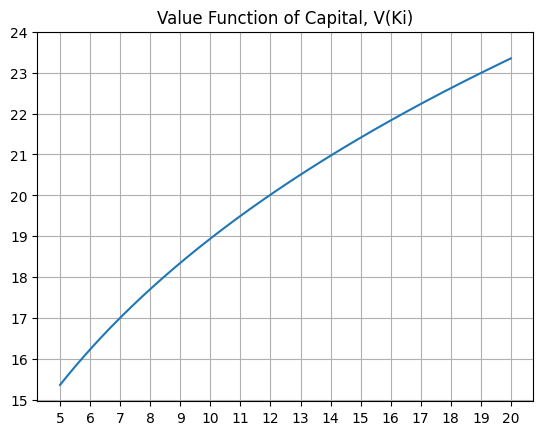

In [25]:
import pandas as pd
ds = {"Capital": [], "Value": []}
for i,v in enumerate(state_values):
    c = capital[i]
    ds['Capital'].append(c)
    ds['Value'].append(v)

df = pd.DataFrame(ds)
T = len(df)
plt.title("Value Function of Capital, V(Ki)")
_=plt.plot(df["Capital"], df["Value"])
_=plt.xticks(np.arange(round(np.min(df["Capital"])), np.max(df["Capital"]+1), step=1))  
_=plt.yticks(np.arange(round(np.min(df["Value"])), np.max(df["Value"]+1), step=1))  
plt.grid()
plt.show()

# Consumption across time

In [26]:
def get_capital_choices(capital_levels: np.array):
    """
        Returns capital trajectories for the initial capital 
    """
    state_path = np.load('repo/path.npy')
    f = np.vectorize(lambda x: capital_levels[x])
    capital_paths = f(state_path)
    return capital_paths

def production(capital, alpha):
    return capital**alpha

def consumption(k_now, k_next, alpha, delta):
    return production(k_now, alpha) + (1-delta)*k_now - k_next

def get_consumption_levels(capital_paths, production_function, delta):
    path_nums, _ = capital_paths.shape
    ct = np.zeros_like(capital_paths)
    for i in range(path_nums):
        capital_t = capital_paths[i, :]
        stored_t  = (1-delta)*capital_t
        capital_next = np.append(capital_paths[i, 1:], [0])
        ct[i, :] = production_function(capital_t) + stored_t - capital_next
    return ct

def get_future_capital(capital_paths, production_function, delta):
    path_nums, _ = capital_paths.shape
    ct = np.zeros_like(capital_paths)
    for i in range(path_nums):
        capital_t = capital_paths[i, :]
        stored_t  = (1-delta)*capital_t
        capital_next = np.append(capital_paths[i, 1:], [0])
        ct[i, :] = production_function(capital_t) + stored_t - capital_next
    return ct

levels = 1000, T = 217


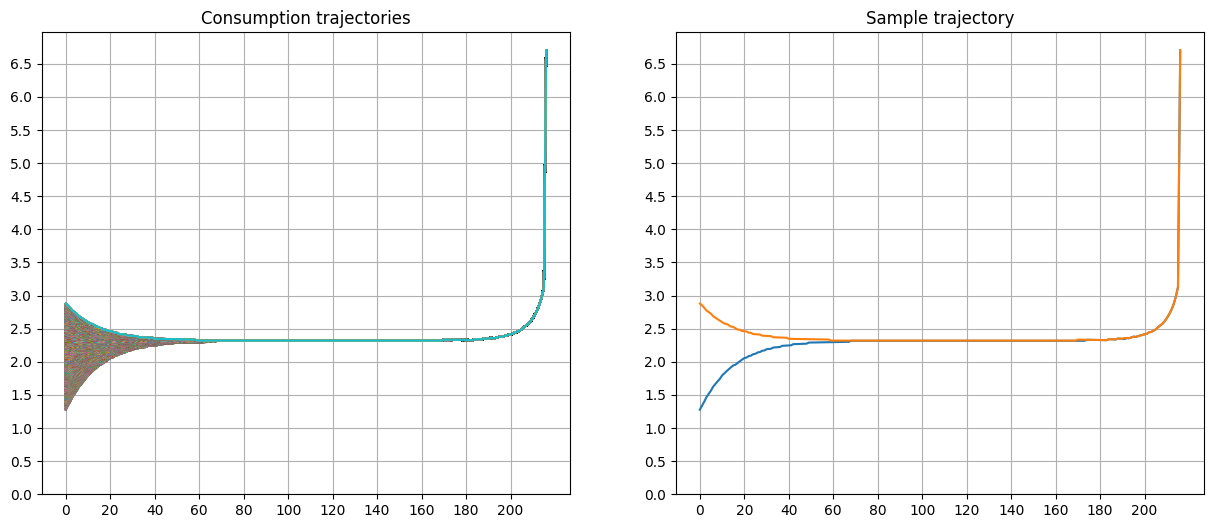

In [29]:
alpha = 0.4
delta = 0.04

capital_levels = np.linspace(5, 20, num=1000)
capital_paths = get_capital_choices(capital_levels)
N, T = capital_paths.shape
print(f"levels = {N}, T = {T}")

production_function = lambda xs : production(xs, alpha)
ct = get_consumption_levels(capital_paths, production_function, delta)

fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0].set_title("Consumption trajectories")
axes[0].plot(ct.T)
axes[0].set_xticks(np.arange(0, T, step=20))
axes[0].set_yticks(np.arange(0, np.max(ct), step=0.5))  
axes[0].grid()

axes[1].set_title("Sample trajectory")
_=axes[1].plot(ct[0])
_=axes[1].plot(ct[-1])
axes[1].set_xticks(np.arange(0, T, step=20))
axes[1].set_yticks(np.arange(0, np.max(ct), step=0.5))  
axes[1].grid()

## Capital Consumption, Kt(Ct)

(1000, 217) (1000, 217) 217


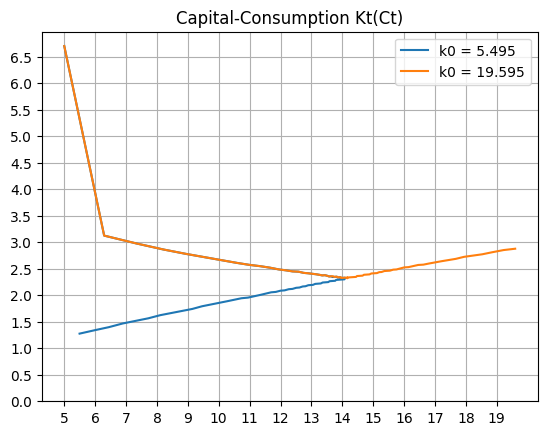

In [28]:
print(capital_paths.shape, ct.shape, len(capital_paths[0,:]))
N, T = capital_paths.shape
plt.title("Capital-Consumption Kt(Ct)")

sample = [0, -1]
for i in sample:
    k0 = round(capital_paths[i,:][0], 3)
    _=plt.plot(capital_paths[i,:], ct[i, :], label=f"k0 = {k0}")

_=plt.xticks(np.arange(np.min(capital_paths), np.max(capital_paths), step=1))  
_=plt.yticks(np.arange(0, np.max(ct), step=0.5))  
plt.grid()
plt.legend()

## Capital vs. Next capital: k(k')

221 221


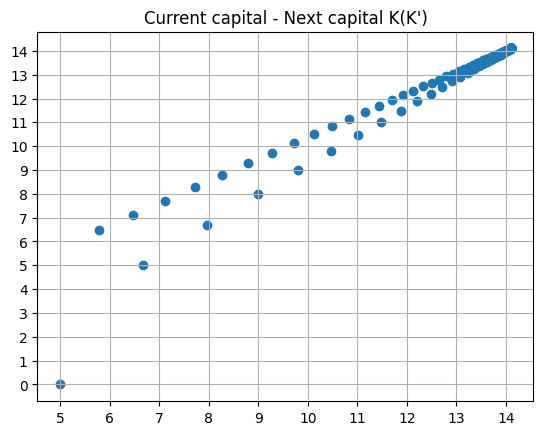

In [190]:
i = 4
capital_t = capital_paths[i, :]
capital_next = np.append(capital_paths[i, 1:], [0])
print(len(capital_t), len(capital_next))

plt.title("Current capital - Next capital K(K')")
plt.scatter(capital_t, capital_next)
_=plt.xticks(np.arange(np.min(capital_t), np.max(capital_t), step=1))  
_=plt.yticks(np.arange(np.min(capital_next), np.max(capital_next), step=1))  
plt.grid()

## Steady state